In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
plt.set_cmap('Pastel1')
import seaborn as sns
import random


N = 240
V = 441
x1 = 21
x2 = 21
nsrcs = 6


<Figure size 432x288 with 0 Axes>

## Question 1.1

In [2]:
# Question 1.1

AV = np.array([0,20,0,0,0,0])
IV = np.array([30,45,60,40,40,40])
ONES = np.array([15,20,25,15,20,25])

In [3]:
TC = np.zeros((nsrcs,N))

for x in range(nsrcs):
    i = 0
    while i < N and i+ONES[x] < N:
        if i == 0:
            i += AV[x]

        TC[x][i:i+ONES[x]] = 1
        i += IV[x]

In [4]:
for x in range(nsrcs):
    print(np.mean(TC[x]))
    TC[x] = (TC[x] - np.mean(TC[x])) / np.std(TC[x])

0.5
0.4166666666666667
0.4166666666666667
0.375
0.5
0.625


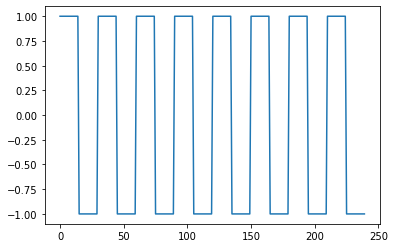

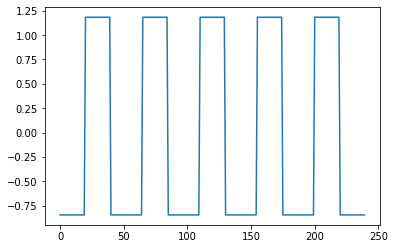

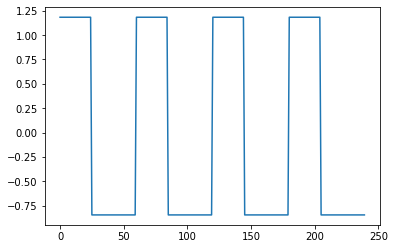

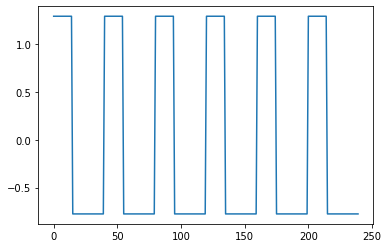

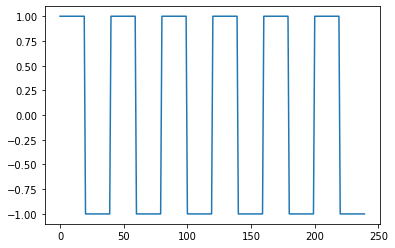

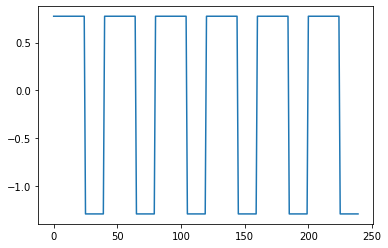

In [5]:
for i in range(6):
    plt.plot(TC[i])
    plt.savefig(f"plots/1.1_{i}.png")
    plt.show()

## Question 1.2

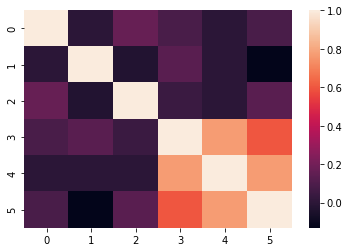

In [6]:
sns.heatmap(np.corrcoef(TC))
plt.savefig(f"plots/1.2.png")
plt.show()

In [7]:
print(np.corrcoef(TC)[3][4])
print(np.corrcoef(TC)[4][5])

0.7745966692414841
0.774596669241484


In [8]:
np.corrcoef(TC)

array([[ 1.00000000e+00, -6.47630098e-18,  1.69030851e-01,
         8.60662966e-02,  0.00000000e+00,  8.60662966e-02],
       [-6.47630098e-18,  1.00000000e+00, -2.85714286e-02,
         1.30930734e-01,  1.57281595e-17, -1.30930734e-01],
       [ 1.69030851e-01, -2.85714286e-02,  1.00000000e+00,
         4.36435780e-02, -1.20274161e-17,  1.30930734e-01],
       [ 8.60662966e-02,  1.30930734e-01,  4.36435780e-02,
         1.00000000e+00,  7.74596669e-01,  6.00000000e-01],
       [ 0.00000000e+00,  1.57281595e-17, -1.20274161e-17,
         7.74596669e-01,  1.00000000e+00,  7.74596669e-01],
       [ 8.60662966e-02, -1.30930734e-01,  1.30930734e-01,
         6.00000000e-01,  7.74596669e-01,  1.00000000e+00]])

## Question 1.3

In [9]:
def construct_tmpSM(vx, vy, hx, hy):
    tmpsm = np.zeros((x1,x2))
    for i in range(len(tmpsm[vx:vy+1])):
        tmpsm[vx:vy+1][i][hx:hy+1] = 1
    return tmpsm
    

In [10]:
tmpSM = []

tmpSM.append(construct_tmpSM(2,6,2,6))
tmpSM.append(construct_tmpSM(2,6,15,19))
tmpSM.append(construct_tmpSM(8,13,2,6))
tmpSM.append(construct_tmpSM(8,13,15,19))
tmpSM.append(construct_tmpSM(15,19,2,6))
tmpSM.append(construct_tmpSM(15,19,15,19))

In [11]:
def plotSM(data, i):
    fig, ax = plt.subplots()
    sns.heatmap(data, ax=ax)
    ax.set_xlim(1,21)
    ax.set_ylim(21,1)
    plt.savefig(f"plots/1.3_{i}.png")
    plt.show()

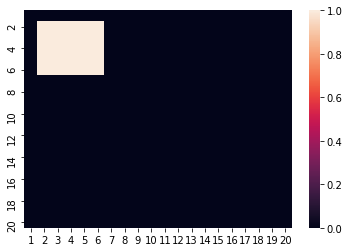

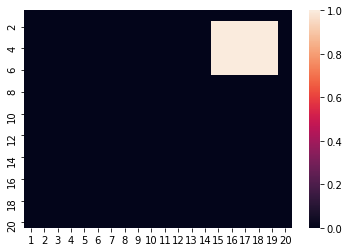

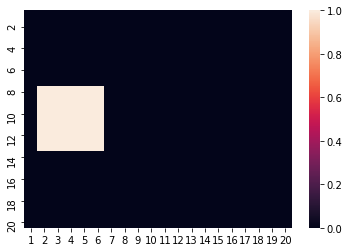

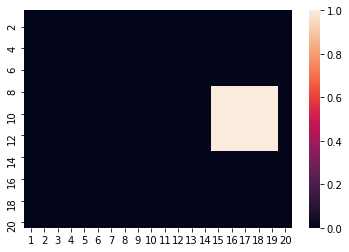

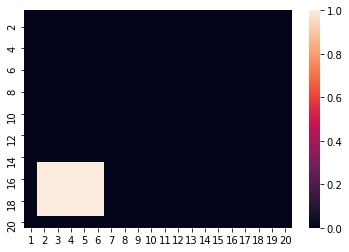

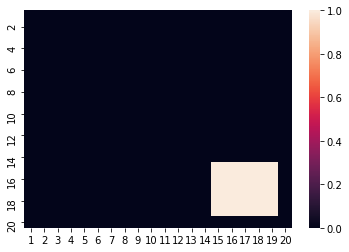

In [12]:
for i in range(6):
    plotSM(tmpSM[i], i)

In [13]:

# bruh = np.array(tmpSM)
# SM = np.reshape(bruh, (6,441))

SM = np.reshape(tmpSM, (6,441))

In [14]:
test_SM = np.zeros((6,441))

for i in range(6):
    test_SM[i] = (SM[i] - np.mean(SM[i])) / np.std(SM[i])

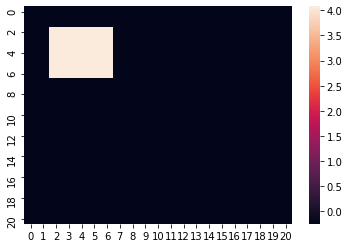

In [15]:
sns.heatmap(np.reshape(test_SM[0], (21, 21)))
plt.show()

In [16]:
len(tmpSM)

6

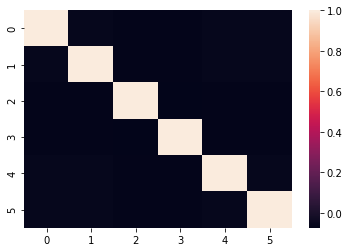

In [17]:
sns.heatmap(np.corrcoef(SM))
plt.savefig(f"plots/1.3_CM.png")
plt.show()

## Question 1.4

In [18]:
Gt = np.random.normal(0, np.sqrt(0.25), (240,6))
Gs = np.random.normal(0, np.sqrt(0.015), (6,441))

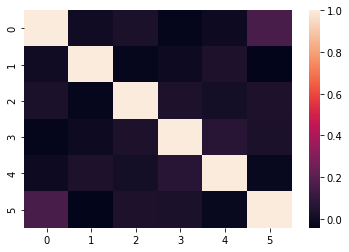

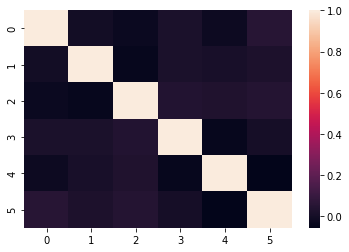

In [19]:
sns.heatmap(np.corrcoef(np.transpose(Gt)))
plt.savefig(f"plots/1.4_Gt.png")
plt.show()
sns.heatmap(np.corrcoef(Gs))
plt.savefig(f"plots/1.4_Gs.png")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


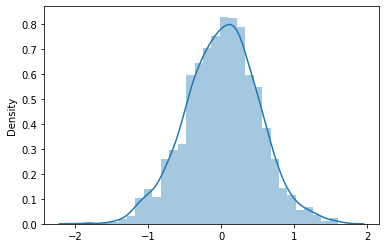

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


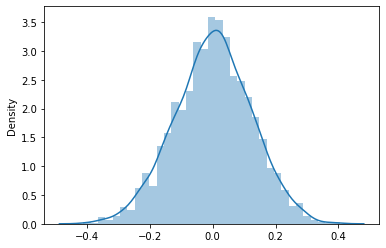

In [20]:
# sns.displot(Ga, legend=False)
# plt.show()
# sns.displot(Gt, legend=False)
# plt.show()

sns.distplot(Gt)
plt.savefig(f"plots/1.4_distGt.png")
plt.show()
sns.distplot(Gs)
plt.savefig(f"plots/1.4_distGs.png")
plt.show()

In [21]:
what = np.matmul(Gt, Gs)

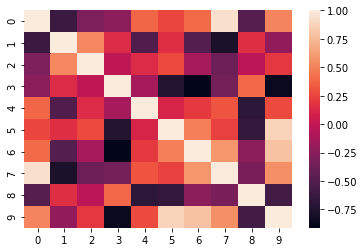

In [22]:
sns.heatmap(np.corrcoef(what.T[:10]))
plt.savefig(f"plots/1.4_CM.png")
plt.show()

## Question 1.5

In [66]:
X = np.matmul(np.transpose(TC) + Gt, SM + Gs)
# X = np.matmul(np.transpose(TC), SM) + np.matmul(Gt, Gs)

In [24]:
X.shape

(240, 441)

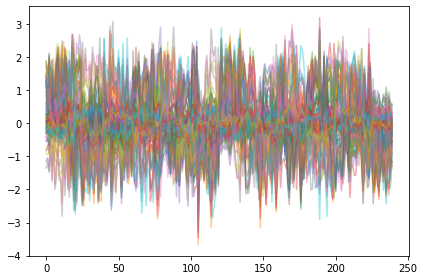

In [25]:
import random

random.seed(1)

a = random.sample(range(V), 100)

for i in a:
    sns.lineplot(data = np.transpose(np.transpose(X)[i]), dashes=False, palette = 'rainbow', alpha=0.4)
plt.tight_layout()
plt.savefig(f"plots/1.5_timeseries.png")
# plt.legend(a)
plt.show()


In [26]:
varX = []
for i in range(len(np.transpose(X))):
    varX.append(np.var(np.transpose(X)[i]))


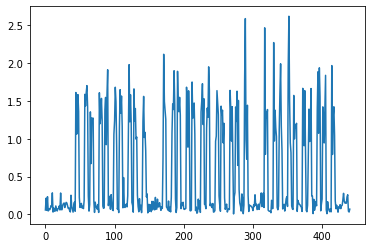

In [27]:
plt.plot(varX)
plt.savefig(f"plots/1.5_varX.png")
plt.show()

In [28]:
# # Standardise
# for i in range(len(X)):
#     X[i] = (X[i] - np.mean(X[i])) / np.std(X[i])

In [67]:
# Standardise
X = np.transpose(X)
for j in range(441):
    X[j] = (X[j] - np.mean(X[j])) / np.std(X[j])
X = np.transpose(X)

In [68]:
X

array([[ 0.13635078, -0.54583397, -1.0752309 , ...,  0.30460329,
         0.31549437, -1.87488261],
       [ 0.34934755, -0.60320326, -1.07938661, ..., -0.11866927,
        -0.29547962, -1.24874873],
       [ 0.52443444, -0.73495949, -1.84910677, ..., -0.22227614,
        -0.5158633 , -1.98836259],
       ...,
       [-1.29192636,  0.35265719,  1.66934437, ...,  0.9933513 ,
        -0.12099485,  1.0236031 ],
       [-1.24110171,  0.68411112,  1.37178447, ...,  0.2000307 ,
         0.74239354,  0.37003006],
       [-0.69544211, -0.3454363 ,  1.5186609 , ...,  0.88105711,
        -0.3927296 ,  1.10579933]])

## Question 2.1

In [69]:
D = np.transpose(TC)
Dt = np.transpose(D)

A_lsr = abs(np.matmul(np.matmul(np.linalg.inv(np.matmul(Dt, D)), Dt), X))
D_lsr = np.matmul(X,np.transpose(A_lsr))

In [32]:
np.mean(A_lsr)

0.29013877086375583

In [33]:
len(A_lsr[0]) 

441

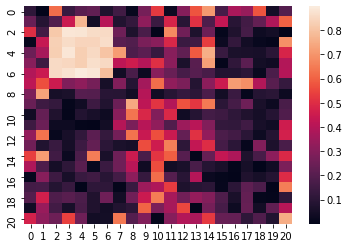

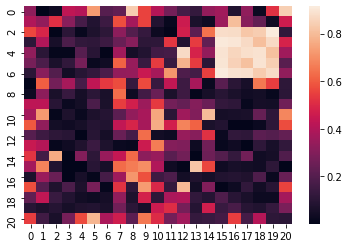

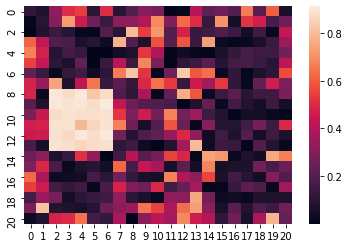

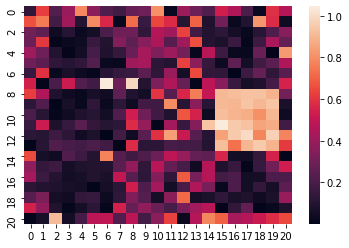

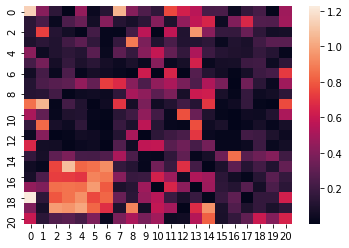

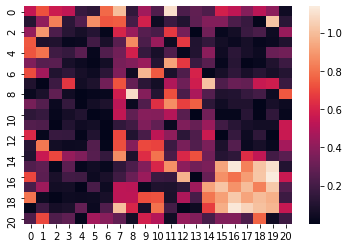

In [34]:
for i in range(6):
    sns.heatmap(np.reshape(A_lsr[i], (21, 21)))
    plt.savefig(f"plots/2.1_{i}_Alsr.png")
    plt.show()

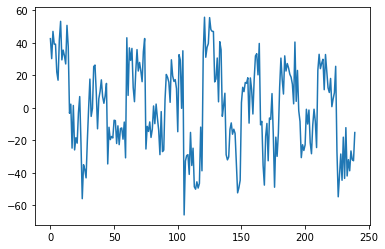

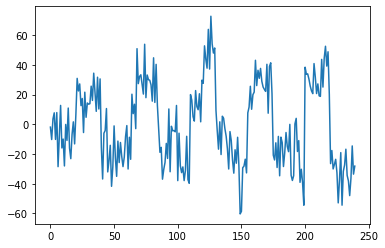

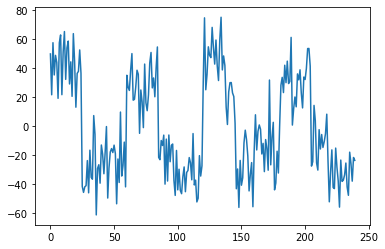

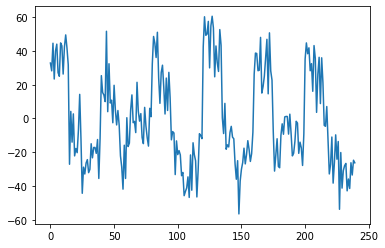

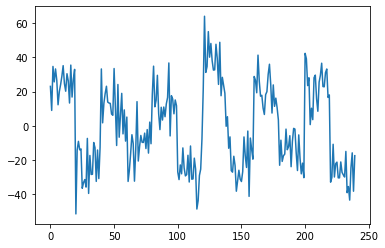

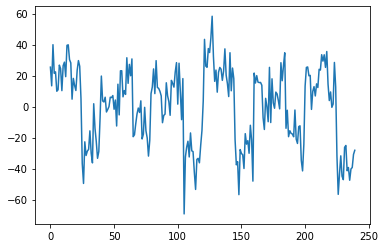

In [35]:
for i in range(6):
    plt.plot(np.transpose(D_lsr)[i])
    plt.savefig(f"plots/2.1_{i}_Dlsr.png")
    plt.show()

In [73]:
len(np.transpose(X)[29])

240

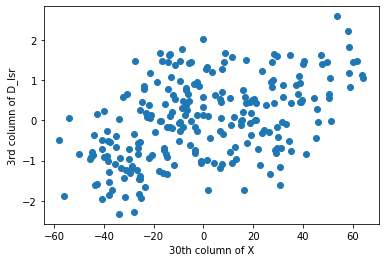

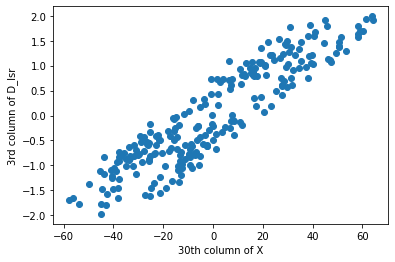

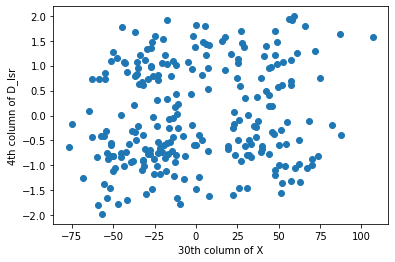

In [74]:
# plt.scatter(np.transpose(D_lsr)[2], np.transpose(X)[29])
# plt.ylabel("3rd column of D_lsr")
# plt.xlabel("30th column of X")
# plt.savefig(f"plots/2.1_scattercopium.png")
# plt.show()
plt.scatter(D_lsr.T[2], X.T[9*21+2])
plt.ylabel("3rd column of D_lsr")
plt.xlabel("30th column of X")
plt.savefig(f"plots/2.1_scatter.png")
plt.show()
plt.scatter(D_lsr.T[3], X.T[9*21+2])
plt.ylabel("4th column of D_lsr")
plt.xlabel("30th column of X")
plt.savefig(f"plots/2.1_scatter1.png")
plt.show()

In [38]:
X.shape

(240, 441)

## Question 2.2

In [39]:
lmbda = 0.2*V
I = np.identity(6)
A_rr = abs(np.linalg.inv((Dt @ D) + lmbda*I) @ Dt @ X)
D_rr = X @ np.transpose(A_rr)

In [40]:
c_tlsr = []
c_trr = []

for i in range(6):
    c_tlsr.append(max(np.corrcoef(np.transpose(D_lsr), TC[i])[-1, :-1]))
    c_trr.append(max(np.corrcoef(np.transpose(D_rr), TC[i])[-1, :-1]))

In [41]:
print(sum(c_tlsr))
print(sum(c_trr))

5.046691164933603
5.129002711305639


In [42]:
lmbda = 1000
A_rr = abs(np.linalg.inv((Dt @ D) + lmbda * I) @ Dt @ X)
D_rr = X @ np.transpose(A_rr)

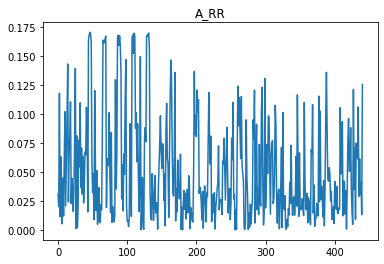

In [43]:
plt.plot(A_rr[0])
plt.title("A_RR")
plt.savefig(f"plots/2.2_Arr.png")
plt.show()

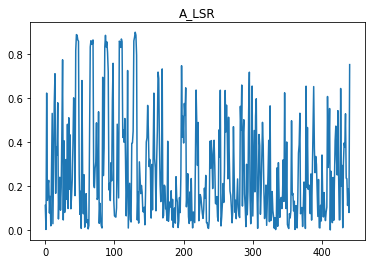

In [44]:
plt.plot(A_lsr[0])
plt.title("A_LSR")
plt.savefig(f"plots/2.2_Alsr.png")
plt.show()

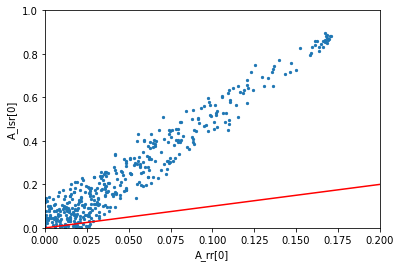

In [45]:
plt.scatter(A_rr[0], A_lsr[0], s=5)
plt.xlabel("A_rr[0]")
plt.ylabel("A_lsr[0]")
plt.xlim((0, 0.2)) 
plt.ylim((0, 1)) 
plt.plot([0, 1], [0, 1], c="r") 
plt.savefig(f"plots/2.2_compare.png")
plt.show()

## Question 2.3

In [46]:
def compute_MSE_sum(rho, X):
    step = 1/(np.linalg.norm(D @ Dt)*1.1)
    thr = rho*N*step
    Ao = np.zeros((nsrcs, 1))
    A = np.zeros((nsrcs, 1))
    A_lr = np.zeros((nsrcs, x1*x2))
    
    A_lr = np.transpose(A_lr)
    for k in range(0,x1*x2):
        A = Ao + step * (TC @ (np.reshape(X.T[k],(240,1)) - (TC.T @ Ao)))
        A = (1/(1+thr)) * np.sign(A)* np.maximum(np.zeros((nsrcs, 1)), abs(A)-thr) 
        for i in range(10):
            Ao = A
            A = Ao + step * (TC @ (np.reshape(X.T[k],(240,1)) - (TC.T @ Ao)))
            A = (1/(1+thr)) * np.sign(A)*np.maximum(np.zeros((nsrcs, 1)), abs(A)-thr)
        A_lr[k] =  np.reshape(A, (6))

    A_lr = np.transpose(A_lr)
    D_lr = X @ np.transpose(A_lr)
    

    MSE_sum = sum(sum(np.power((X-(D_lr @ A_lr)), 2)))/(N*V)
#     MSE_sum = (((X-D_lr @ A_lr)**2).sum())/(N*V)

    return MSE_sum


In [47]:
random.seed(2)

rho_MSE = []
for rho in list(np.arange(0.0,1.05,0.05)):
    MSE = []
    for i in range(10):
        Gt = np.random.normal(loc=0.0, scale=np.sqrt(0.25), size=(240,6))
        Gs = np.random.normal(loc=0.0, scale=np.sqrt(0.015), size=(6,441))
        X = np.matmul(np.transpose(TC) + Gt, SM + Gs)
        
        # Standardise
        X = np.transpose(X)
        for j in range(441):
            X[j] = (X[j] - np.mean(X[j])) / np.std(X[j])
        X = np.transpose(X)
        
        MSE.append(compute_MSE_sum(rho, X))
    rho_MSE.append([rho,np.mean(MSE)])


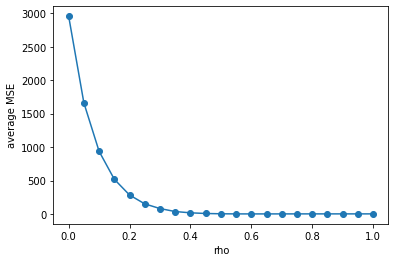

In [83]:
plt.plot(np.transpose(rho_MSE)[0], np.transpose(rho_MSE)[1])
plt.scatter(x=np.transpose(rho_MSE)[0], y=np.transpose(rho_MSE)[1])
plt.xlabel("rho")
plt.ylabel("average MSE")
plt.savefig(f"plots/2.3_rhoMSE.png")
plt.show()

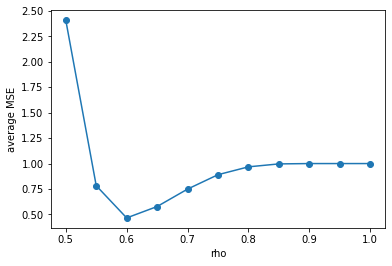

In [84]:
plt.plot(np.transpose(rho_MSE)[0][10:], np.transpose(rho_MSE)[1][10:])
plt.scatter(x=np.transpose(rho_MSE)[0][10:], y=np.transpose(rho_MSE)[1][10:])
plt.xlabel("rho")
plt.ylabel("average MSE")
plt.savefig(f"plots/2.3_rhoMSE2.png")
plt.show()

## Question 2.4

In [75]:
def compute_Alr(rho, X):
    step = 1/(np.linalg.norm(D @ Dt)*1.1)
    thr = rho*N*step
    Ao = np.zeros((nsrcs, 1))
    A = np.zeros((nsrcs, 1))
    A_lr = np.zeros((nsrcs, x1*x2))
    
    A_lr = np.transpose(A_lr)
    for k in range(0,x1*x2):
        tmp = step * (Dt @ (np.reshape(X.T[k],(240,1)) - (D @ Ao)))
        A = Ao + tmp
        A = (1/(1+thr)) * np.sign(A)* np.maximum(np.zeros((nsrcs, 1)), abs(A)-thr) 
        for i in range(10):
            Ao = A
            A = Ao + step*(Dt @ (np.reshape(np.transpose(X)[k],(240,1)) - (D @ Ao)))
            A = (1/(1+thr)) * np.sign(A)*np.maximum(np.zeros((nsrcs, 1)), abs(A)-thr)
        A_lr[k] =  np.reshape(A, (6))

    A_lr = np.transpose(A_lr)
    return A_lr


In [79]:
rho = 0.6
A_lr = abs(compute_Alr(rho, X))
D_lr = X @ np.transpose(A_lr)

c_trr = []
c_srr = []
c_tlr = []
c_slr = []

for i in range(6):
    c_trr.append(max(np.corrcoef(np.transpose(D_rr), TC[i])[-1, :-1]))
    c_srr.append(max(np.corrcoef(A_rr, SM[i])[-1, :-1]))
    c_tlr.append(max(np.corrcoef(np.transpose(D_lr), TC[i])[-1, :-1]))
    c_slr.append(max(np.corrcoef(A_lr, SM[i])[-1, :-1]))

In [80]:
print(sum(c_tlr))
print(sum(c_trr))
print()
print(sum(c_slr))
print(sum(c_srr))

5.321298204753061
5.079463740834822

5.092572249465712
3.250344074192368


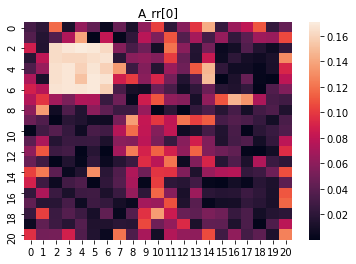

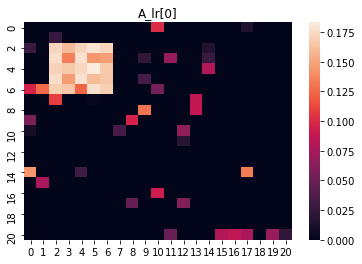

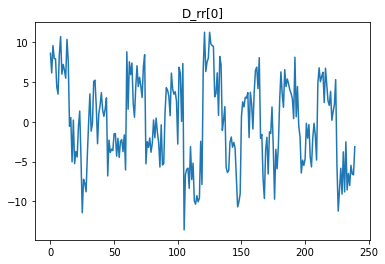

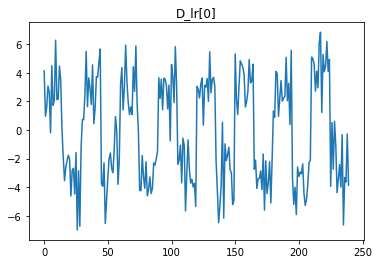

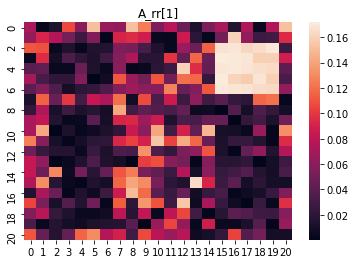

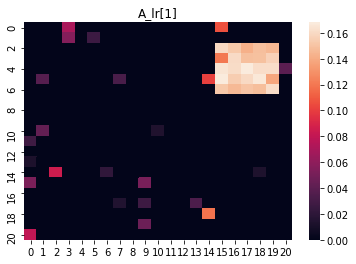

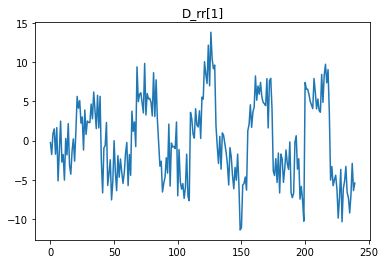

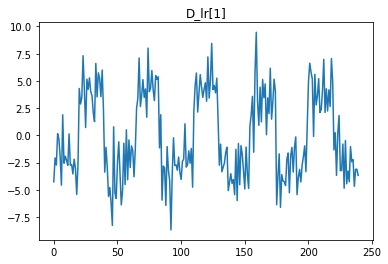

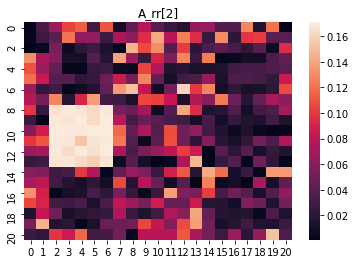

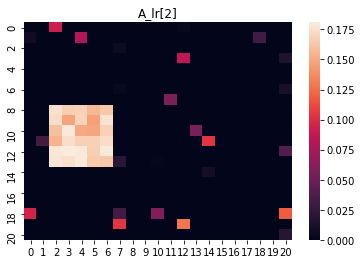

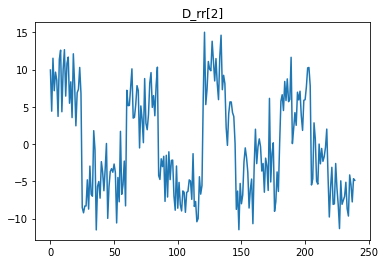

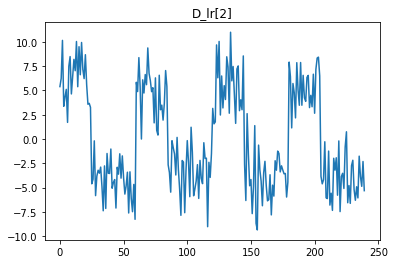

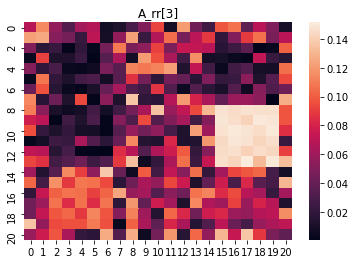

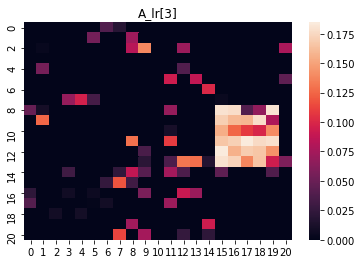

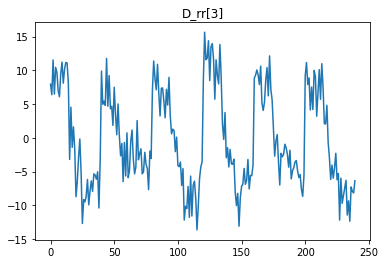

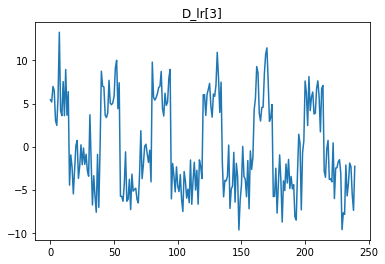

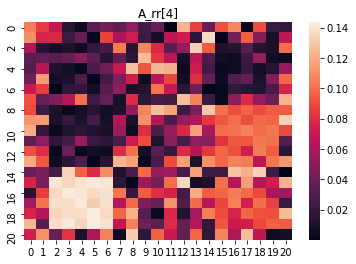

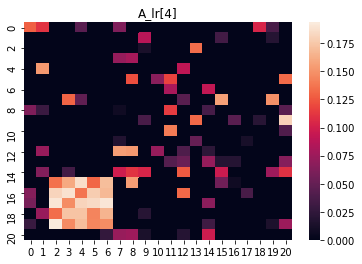

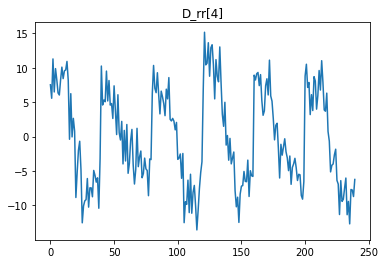

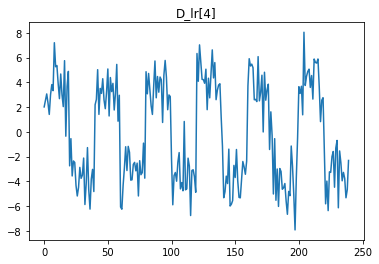

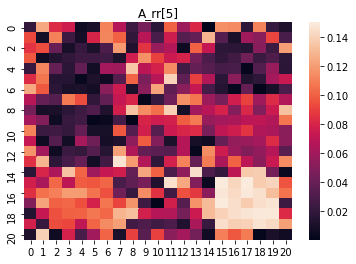

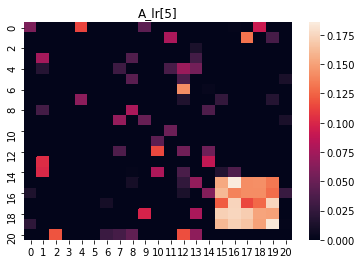

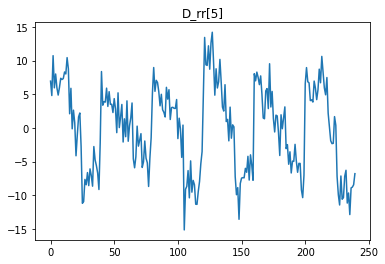

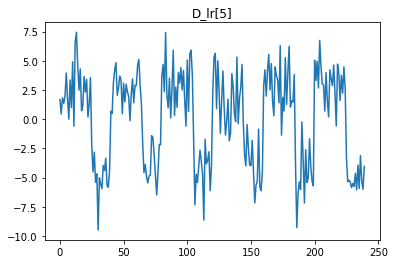

In [81]:
for i in range(6):
    sns.heatmap(np.reshape(A_rr[i], (21, 21)))
    plt.title(f"A_rr[{i}]")
    plt.savefig(f"plots/2.4_{i}_Arr.png")
    plt.show()
    sns.heatmap(np.reshape(A_lr[i], (21, 21)))
    plt.title(f"A_lr[{i}]")
    plt.savefig(f"plots/2.4_{i}_Alr.png")
    plt.show()
    plt.plot(np.transpose(D_rr)[i])
    plt.title(f"D_rr[{i}]")
    plt.savefig(f"plots/2.4_{i}_Drr.png")
    plt.show()
    plt.plot(np.transpose(D_lr)[i])
    plt.title(f"D_lr[{i}]")
    plt.savefig(f"plots/2.4_{i}_Dlr.png")
    plt.show()

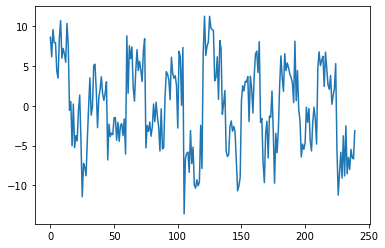

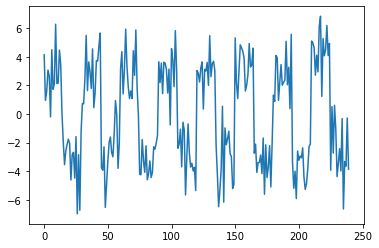

In [82]:
plt.plot(np.transpose(D_rr)[0])
plt.show()
plt.plot(np.transpose(D_lr)[0])
plt.show()

## Question 2.5

In [55]:
np.linalg.svd(TC)[0]

array([[-0.07547725, -0.65622983,  0.27383063, -0.69491023,  0.02352637,
        -0.07230956],
       [ 0.00182036,  0.23060954,  0.9228611 ,  0.15452469,  0.26694917,
         0.00189375],
       [-0.07644906, -0.69510789,  0.08033206,  0.70146127, -0.0822161 ,
        -0.07563011],
       [-0.55928169,  0.09419415,  0.17961053, -0.02395617, -0.68756474,
         0.41563487],
       [-0.59912548,  0.14242208, -0.03861215, -0.00205921,  0.02130854,
        -0.78664821],
       [-0.56276821, -0.06204901, -0.18204424,  0.02440991,  0.66949671,
         0.4443873 ]])

In [56]:
TC

array([[ 1.        ,  1.        ,  1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-0.84515425, -0.84515425, -0.84515425, ..., -0.84515425,
        -0.84515425, -0.84515425],
       [ 1.18321596,  1.18321596,  1.18321596, ..., -0.84515425,
        -0.84515425, -0.84515425],
       [ 1.29099445,  1.29099445,  1.29099445, ..., -0.77459667,
        -0.77459667, -0.77459667],
       [ 1.        ,  1.        ,  1.        , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.77459667,  0.77459667,  0.77459667, ..., -1.29099445,
        -1.29099445, -1.29099445]])

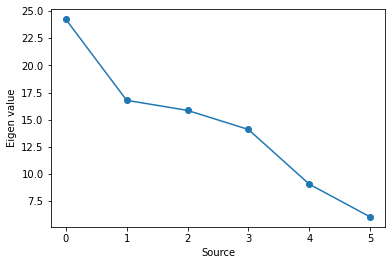

In [57]:
plt.plot(np.linalg.svd(TC)[1])
plt.scatter(x=range(6), y=np.linalg.svd(TC)[1])
plt.ylabel("Eigen value")
plt.xlabel("Source")
plt.savefig(f"plots/2.5_eigenvalues.png")
plt.show()

In [58]:
Z = np.linalg.svd(TC)[0]

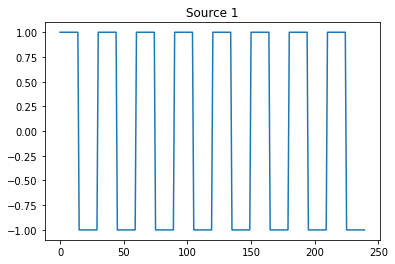

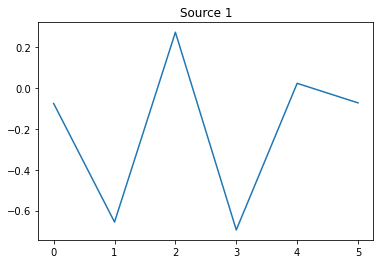

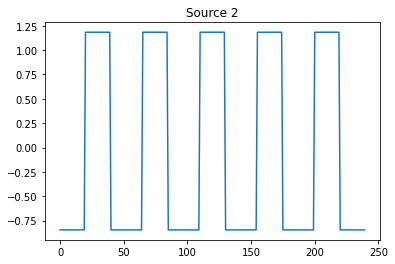

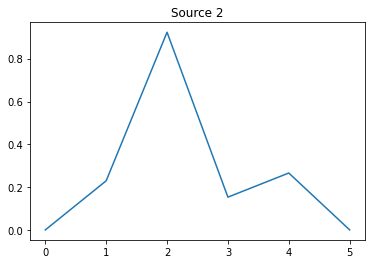

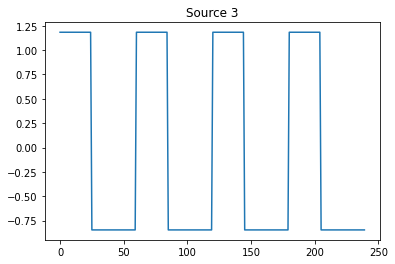

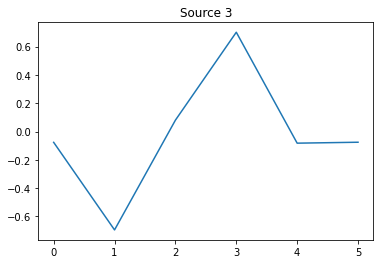

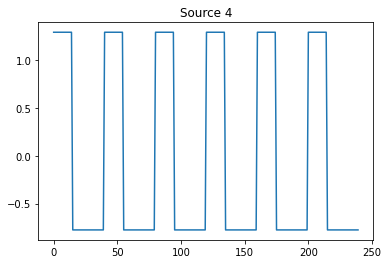

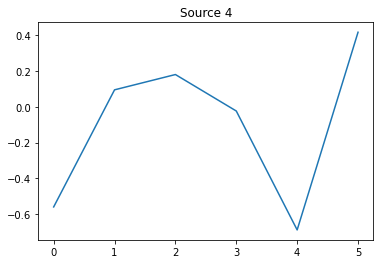

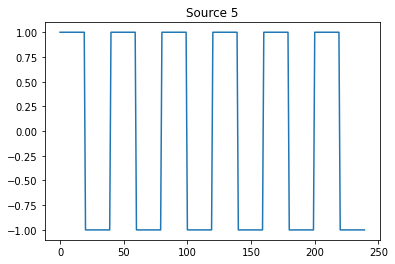

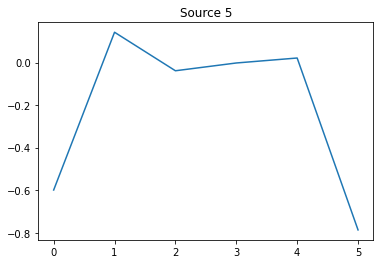

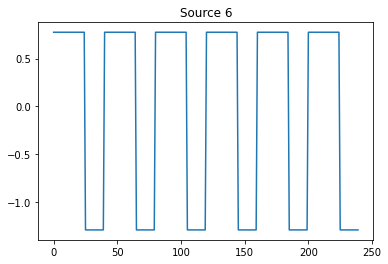

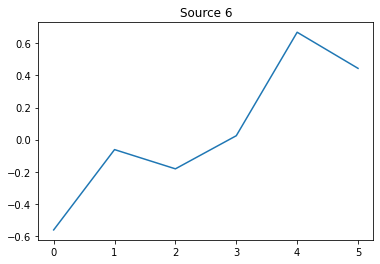

In [59]:
for i in range(6):
    plt.plot(TC[i])
    plt.title(f"Source {i+1}")
    plt.savefig(f"plots/2.5_{i}_TC.png")
    plt.show()
    plt.plot(Z[i])
    plt.title(f"Source {i+1}")
    plt.savefig(f"plots/2.5_{i}_Z.png")
    plt.show()

In [60]:
def compute_Alr2(rho, X, D, Dt):
    step = 1/(np.linalg.norm(D @ Dt)*1.1)
    thr = rho*N*step
    Ao = np.zeros((nsrcs, 1))
    A = np.zeros((nsrcs, 1))
    A_lr = np.zeros((x1*x2, nsrcs))

    for k in range(0,x1*x2):
        tmp = step * (Dt @ (np.reshape(np.transpose(X)[k],(240,1)) - (D @ Ao)))
        A = Ao + tmp
        A = (1/(1+thr)) * np.sign(A)* np.maximum(np.zeros((nsrcs, 1)), abs(A)-thr) 
        for i in range(10):
            Ao = A
            A = Ao + step*(Dt @ (np.reshape(np.transpose(X)[k],(240,1)) - (D @ Ao)))
            A = (1/(1+thr)) * np.sign(A)*np.maximum(np.zeros((nsrcs, 1)), abs(A)-thr)
        A_lr[k] =  np.reshape(A, (6))

    A_lr = np.transpose(A_lr)
    return A_lr
    

In [61]:
U, sdiag, VH = np.linalg.svd(TC)
Z = np.zeros((6, 240))
np.fill_diagonal(Z, sdiag)

In [62]:
rho = 0.001
A_pcr = abs(compute_Alr2(rho,X,np.transpose(Z),Z))
D_pcr = X @ np.transpose(A_pcr)

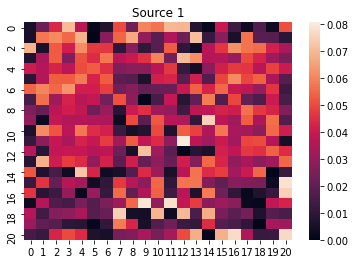

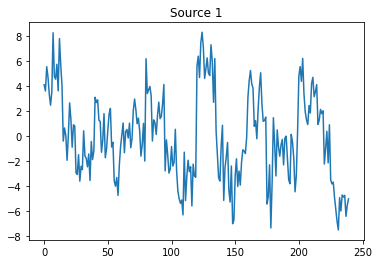

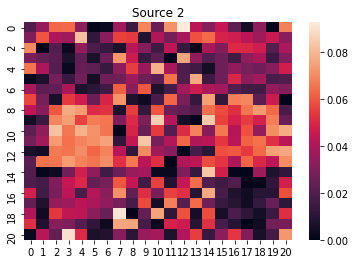

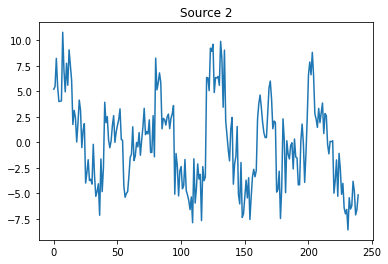

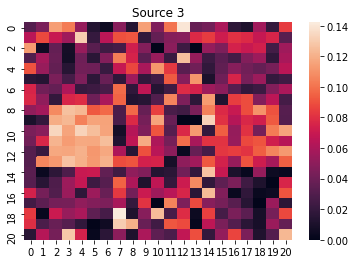

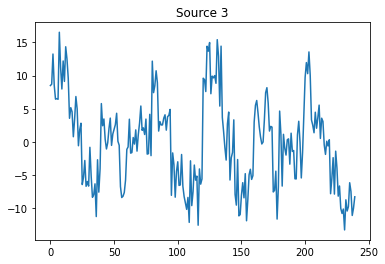

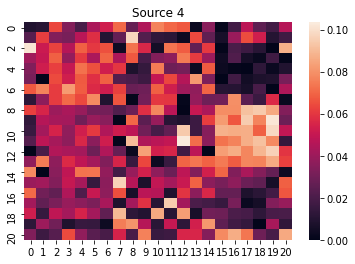

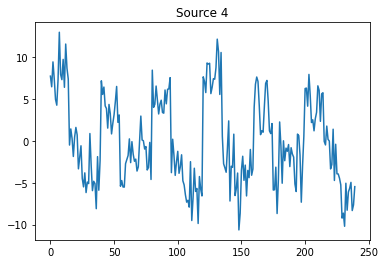

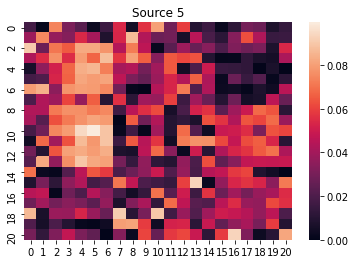

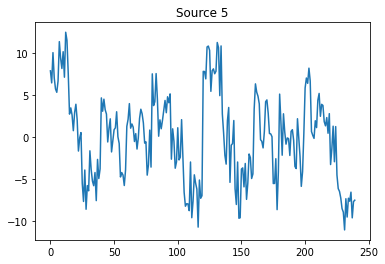

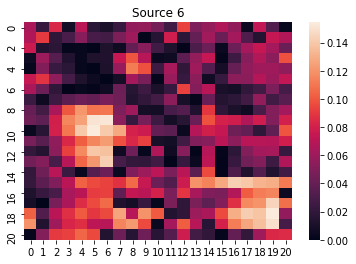

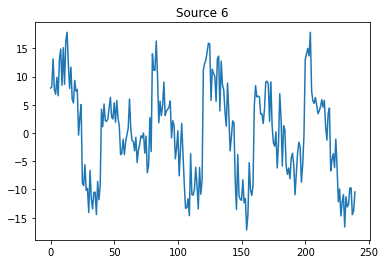

In [63]:
for i in range(6):
    sns.heatmap(np.reshape(A_pcr[i], (21, 21)))
    plt.title(f"Source {i+1}")
    plt.savefig(f"plots/2.5_{i}_A_pcr.png")
    plt.show()
    plt.plot(np.transpose(D_pcr)[i])
    plt.title(f"Source {i+1}")
    plt.savefig(f"plots/2.5_{i}_D_pcr.png")
    plt.show()

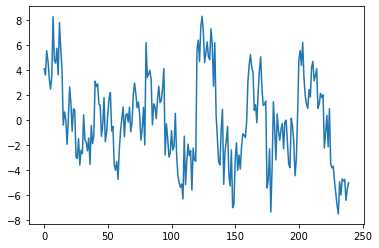

In [64]:
plt.plot(np.transpose(D_pcr)[0])
plt.show()

In [65]:
A_pcr.shape

(6, 441)